In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

(feat_train, targ_train), (feat_test, targ_test) = mnist.load_data()

feat_train = tf.keras.utils.normalize(feat_train, axis = 1) #This normalizes the data so that every value is between 0 and 1. It helps the network work a little better.
feat_test = tf.keras.utils.normalize(feat_test, axis = 1) #Normalize data

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(feat_train, targ_train, epochs = 3)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2646 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1067 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0740 - accuracy: 0.9768


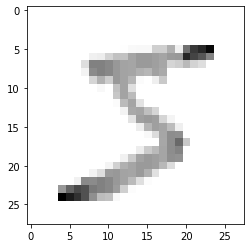

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
plt.imshow(feat_train[0], cmap = plt.cm.binary) #Looks kind of like a 5
plt.show()
print(feat_train[0])

In [ ]:
val_loss, val_acc = model.evaluate(feat_test, targ_test) #This can help us understand if we are overfitting the data.
print(val_loss, val_acc) #We don't want to be seeing too much of a change from this and the final epoch. We want to see numbers that are similar to the final epoch.

313/313 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9723
0.09527017176151276 0.9722999930381775


In [ ]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([feat_test])

313/313 [==============================] - 1s 2ms/step


The macine predicts that this image is 3.


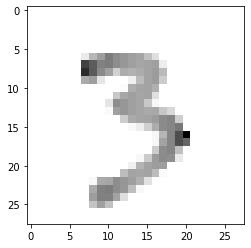

In [ ]:
index = 30
print("The macine predicts that this image is {}.".format(np.argmax(predictions[index])))
plt.imshow(feat_test[index], cmap = plt.cm.binary)
plt.show()